In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.isna().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [ ]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


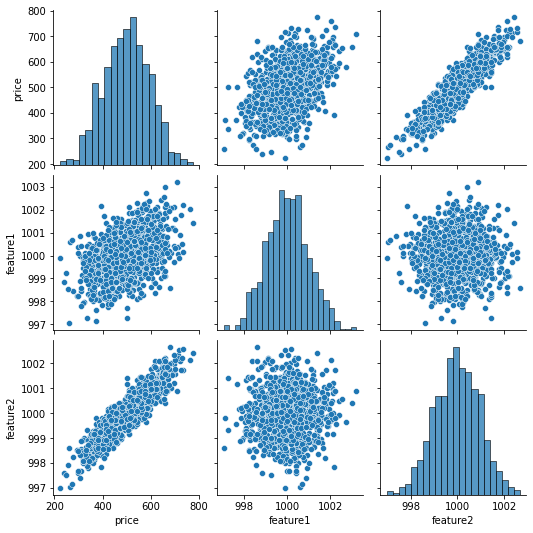

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [ ]:
df.corr().style.background_gradient()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


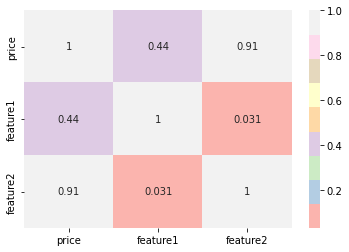

In [ ]:
sns.heatmap(df.corr(),annot=True , cmap='Pastel1')

In [ ]:
df.corr()['price'].sort_values()

feature1    0.444190
feature2    0.907576
price       1.000000
Name: price, dtype: float64

In [ ]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
ann = Sequential()
ann.add(Dense(units=4,activation='relu'))
ann.add(Dense(units=4,activation='relu'))
ann.add(Dense(units=4,activation='relu'))
ann.add(Dense(units=1))

ann.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ann.fit(xtrain,ytrain,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 255804.6094
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 255431.5625
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255085.8438
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 254734.1875
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 254363.0781
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 253942.5781
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 253465.6719
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 252936.0625
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 252340.5000
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 251682.5156
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 250956.5312
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [ ]:
loss=pd.DataFrame(ann.history.history)
loss.head()

,loss
0,255804.609375
1,255431.562500
2,255085.843750
3,254734.187500
4,254363.078125


In [ ]:
loss.tail()

,loss
245,23.478819
246,22.983671
247,24.043444
248,23.391066
249,23.871883


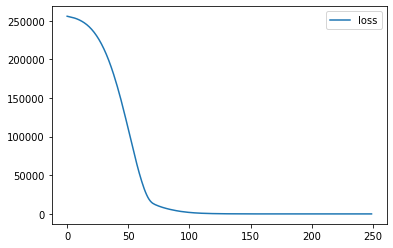

In [ ]:
loss.plot()

In [ ]:
ann.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 1ms/step - loss: 25.0153


25.01528549194336

In [ ]:
ann.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 36.4474


36.447391510009766

In [ ]:
ypred = ann.predict(xtest)

In [ ]:
dic = {'Actual Y':ytest , 'Predicted Y':ypred.flatten()}
df1 = pd.DataFrame(dic)

In [ ]:
df1.head()

,Actual Y,Predicted Y
0,489.057552,480.495544
1,526.210746,525.341064
2,518.360395,500.736145
3,552.778935,540.102295
4,649.395917,648.891052


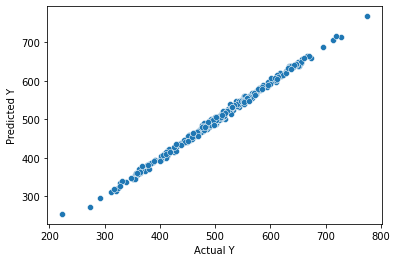

In [ ]:
sns.scatterplot(x='Actual Y', y='Predicted Y',data=df1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE :{mean_squared_error(ytest,ypred)}')
print(f'RMSE :{np.sqrt(mean_squared_error(ytest,ypred))}')

MSE :36.447363052747214
RMSE :6.0371651503621475


In [ ]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [ ]:
newdata = [[900,950]]
newdata = sc.transform(newdata)
ann.predict(newdata)

array([[3366.1472]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
ann.save('ANN_fake_reg')

INFO:tensorflow:Assets written to: ANN_fake_reg/assets


In [ ]:
fr = load_model('ANN_fake_reg')

In [ ]:
fr.predict(newdata)

array([[3366.1472]], dtype=float32)